# Ôn tập giữa kỳ


In [1]:
# import library...
# ...
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## ĐỀ BÀI

Hệ thống giám sát rủi ro dựa trên hành vi (The Behavior Risk Factor Surveilance System - BRFSS) là một cuộc khảo sát qua điện thoại hàng năm với 350.000 người ở Hoa Kỳ. Như tên gọi của nó, BRFSS được thiết kế để xác định các yếu tố nguy cơ ở người trưởng thành và báo cáo các xu hướng sức khỏe mớ. Ví dụ, người trả lời được hỏi về chế độ ăn uống và hoạt động thể chất hàng tuần, tình trạng HIV/AIDS, khả năng sử dụng thuốc lá và thậm chí cả mức độ chi trả dịch vụ chăm sóc sức khỏe của họ.

Bộ dữ liệu **brfss_2000** chứa thông tin khảo sát năm 2000, với hơn 200 thông tin. Trong bộ dữ liệu này, ta chỉ khảo sát một số thông tin sau:
-	genhlth: người khảo sát tự đánh giá sức khỏe (excellent, very good, good, fair or poor)
-	exerany: cho biết có hoạt động thể chất nào trong tháng gần nhất hay không, có (1), không (0)
-	hlthplan: có bảo hiểm (1) hay không (0)
-	smoke100: tổng số điếu thuốc đã hút ít nhất
-	height: chiều cao (inches)
-	weight: cân nặng (pounds)
-	wtdesire:  cân nặng mong muốn(pounds)
-	age: tuổi
-	gender: giới tính: nam(m), nữ(f)


### Câu 1:

Đọc hai bộ dữ liệu trên và cho biết mỗi bộ dữ liệu có kích thước bao nhiêu dòng, bao nhiêu cột?

In [38]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/TKMT và UD/Lab Mid-term/brfss_2000.csv')
df.head()


,exerany,hlthplan,smoke100,height,weight,wtdesire,age,gender,genhlth
0,0,1,0,70,175,175,77,m,good
1,0,1,1,64,125,115,33,f,good
2,1,1,1,60,105,105,49,f,good
3,1,1,0,66,132,124,42,f,good
4,0,1,0,61,150,130,55,f,very good


In [39]:
num_rows, num_columns = df.shape
print(f"Số dòng: {num_rows}, Số cột: {num_columns}")

Số dòng: 20000, Số cột: 9


### Câu 2

a, Tính tỷ lệ nam nữ

b, Trong số những người tập thể thao, tỷ lệ những người tự đánh giá có sức khỏe kém là bao nhiêu?

In [40]:
# a) Tính tỷ lệ nam nữ
f, m = df['gender'].value_counts()
print(f'Nam: {m}, Nữ: {f}')
print(f'Tỷ lệ nam: {m / (m + f)*100} %')
print(f'Tỷ lệ nữ: {f / (m + f)*100} %')

Nam: 9569, Nữ: 10431
Tỷ lệ nam: 47.845 %
Tỷ lệ nữ: 52.154999999999994 %


In [41]:
# b, Trong số những người tập thể thao, tỷ lệ những người tự đánh giá có sức khỏe kém là bao nhiêu?
poor_health_count = df[(df['exerany'] == 1) & (df['genhlth'] == 'poor')].shape[0]
total_exercise_count = df[df['exerany'] == 1].shape[0]
poor_health_rate = (poor_health_count / total_exercise_count)*100

print(f"Tỷ lệ người tập thể thao tự đánh giá sức khỏe kém: {poor_health_rate:.2f}%")


Tỷ lệ người tập thể thao tự đánh giá sức khỏe kém: 1.96%


### Câu 3

a, Đổi đơn vị chiều cao từ inches sang centimet, đơn vị cân nặng từ pound sang kg.

b, Tính tỷ lệ những người muốn giảm cân.

In [42]:
# a, Đổi đơn vị chiều cao từ inches sang centimet, đơn vị cân nặng từ pound sang kg.
df['height'] = df['height'] * 2.54
df['weight'] = df['weight'] * 0.453592
df['wtdesire'] = df['wtdesire'] * 0.453592
df.head()

,exerany,hlthplan,smoke100,height,weight,wtdesire,age,gender,genhlth
0,0,1,0,177.80,79.378600,79.378600,77,m,good
1,0,1,1,162.56,56.699000,52.163080,33,f,good
2,1,1,1,152.40,47.627160,47.627160,49,f,good
3,1,1,0,167.64,59.874144,56.245408,42,f,good
4,0,1,0,154.94,68.038800,58.966960,55,f,very good


In [45]:
# b, Tính tỷ lệ những người muốn giảm cân.
nguoi_muon_giam_can = df[df['wtdesire'] < df['weight']].shape[0]
print(f"Tỷ lệ người muốn giảm cân: {nguoi_muon_giam_can / len(df)*100} %")

Tỷ lệ người muốn giảm cân: 63.82 %


### Câu 4:

a, Theo bạn trong các thuộc tính trên, thuộc tính nào có phân phối chuẩn. Vẽ hình minh họa

b, Vẽ đồ thị boxplot so sánh cân nặng của những người có tập thể dục

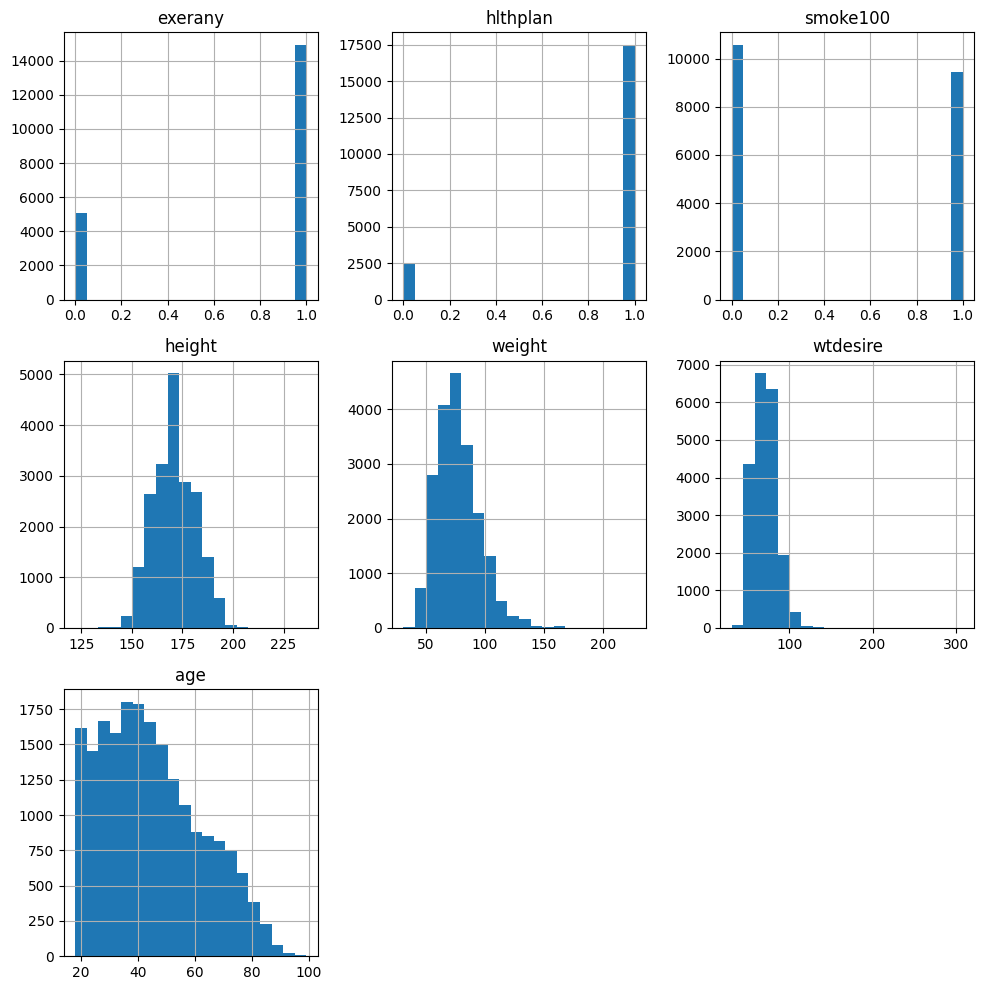

In [47]:
# a, Theo bạn trong các thuộc tính trên, thuộc tính nào có phân phối chuẩn. Vẽ hình minh họa
df.hist(figsize=(10, 10), bins=20)
plt.tight_layout()
plt.show()


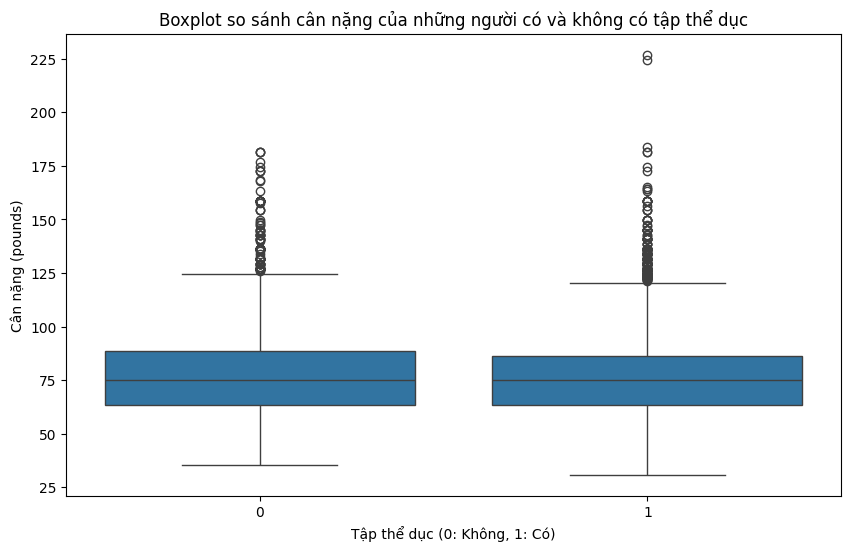

In [48]:
# b, Vẽ đồ thị boxplot so sánh cân nặng của những người có tập thể dục
plt.figure(figsize=(10, 6))
sns.boxplot(x='exerany', y='weight', data=df)
plt.title('Boxplot so sánh cân nặng của những người có và không có tập thể dục')
plt.xlabel('Tập thể dục (0: Không, 1: Có)')
plt.ylabel('Cân nặng (pounds)')
plt.show()



### Câu 5

Phân bố tuổi tác trong mẫu: Hãy mô tả phân bố tuổi của người tham gia khảo sát. Tuổi trung bình, độ lệch chuẩn, và các phân vị 25%, 50%, 75% là bao nhiêu?



In [51]:
age_mean = df['age'].mean()
age_std = df['age'].std()
age_percentiles = df['age'].quantile([0.25, 0.5, 0.75])

print(f"Tuổi trung bình: {age_mean:.2f}")
print(f"Độ lệch chuẩn: {age_std:.2f}")
print(f"Các phân vị 25%, 50%, 75%:")
print(age_percentiles)


Tuổi trung bình: 45.07
Độ lệch chuẩn: 17.19
Các phân vị 25%, 50%, 75%:
0.25    31.0
0.50    43.0
0.75    57.0
Name: age, dtype: float64


### Câu 6

Tỉ lệ người hút thuốc: Tính tỉ lệ phần trăm người tham gia khảo sát hiện đang hút thuốc lá. Liệu có sự khác biệt đáng kể về tỉ lệ này giữa các nhóm tuổi khác nhau không?



In [53]:
smokers_count = df[df['smoke100'] > 0].shape[0]
total_participants = df.shape[0]
smoker_rate = (smokers_count / total_participants) * 100

# Tính sự khác biệt theo nhóm tuổi
age_groups = df.groupby(pd.cut(df['age'], bins=[0, 18, 30, 45, 60, 100])).agg(
    smoker_count=('smoke100', lambda x: (x > 0).sum()),
    total_count=('smoke100', 'size')
)
age_groups['smoker_rate'] = (age_groups['smoker_count'] / age_groups['total_count']) * 100

print(f"Tỷ lệ phần trăm người tham gia khảo sát hiện đang hút thuốc: {smoker_rate:.2f}%")
print(age_groups[['smoker_rate']])


Tỷ lệ phần trăm người tham gia khảo sát hiện đang hút thuốc: 47.21%
           smoker_rate
age                   
(0, 18]      30.065359
(18, 30]     39.453478
(30, 45]     44.994585
(45, 60]     52.929813
(60, 100]    53.764479


<ipython-input-53-1c0bd6bca6d1>:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_groups = df.groupby(pd.cut(df['age'], bins=[0, 18, 30, 45, 60, 100])).agg(


### Câu 7

BMI trung bình theo giới tính: Tính chỉ số BMI trung bình cho nam và nữ trong mẫu.



In [56]:
df['BMI'] = (df['weight'] / ((df['height']/100) ** 2))

# Tính BMI trung bình theo giới tính
bmi_mean = df.groupby('gender')['BMI'].mean()
print(bmi_mean)


gender
f    25.743674
m    26.926313
Name: BMI, dtype: float64


### câu 8

Phân tích tỉ lệ bệnh béo phì: Sử dụng các tiêu chuẩn của CDC về chỉ số BMI để phân loại người tham gia vào nhóm béo phì. Tính tỉ lệ béo phì theo giới tính và độ tuổi.

In [57]:
df['obesity'] = df['BMI'] >= 30

obesity_rate = df.groupby(['gender', pd.cut(df['age'], bins=[0, 18, 30, 45, 60, 100])])['obesity'].mean() * 100
print(obesity_rate)


gender  age      
f       (0, 18]       6.896552
        (18, 30]     13.515901
        (30, 45]     19.070905
        (45, 60]     22.438017
        (60, 100]    19.227468
m       (0, 18]       8.695652
        (18, 30]     14.833641
        (30, 45]     22.970856
        (45, 60]     23.894596
        (60, 100]    17.750827
Name: obesity, dtype: float64


<ipython-input-57-c3022ab11e6b>:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  obesity_rate = df.groupby(['gender', pd.cut(df['age'], bins=[0, 18, 30, 45, 60, 100])])['obesity'].mean() * 100


---